In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Mathematische Modellierung von Infektionskrankheiten

## Was ist ein (mathematisches) Modell?

### Definition

- Vereinfachende Beschreibung eines Systems
- Wird Verwendet, um wichtige von unwichtigen Eigenschaften zu trennen
- Besseres Verständnis des Systems zu erzeugen
- Außerdem Prognose zukünftiger Sachverhalte
- Quantifizierung von Unsicherheit und Variablenrelevanz

### Grenzen von Modellen

- "Bullshit in, Bullshit out"
- Balance zwischen Modellkomplexität und Praktikabilität (z.B. Berechenbarkeit)
- Bias
- Sensitivität ggü. Parametern/Ausgangsdaten ("Butterfly Effect")

### Ein sehr gutes Modell

Eure Interesse an Mathematik während dieses Vortrags ließe sich wie folgt modellieren:

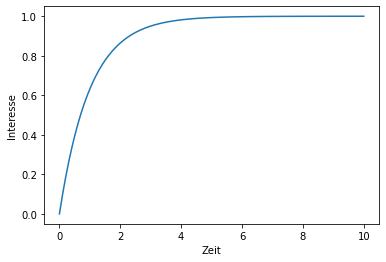

In [2]:
Zeit = np.linspace(0,10,100)
Interesse = 1-np.exp(-Zeit)
plt.plot(Zeit, Interesse)
plt.xlabel("Zeit")
plt.ylabel("Interesse")
plt.show()

### Schwächen dieses Modells

- kann individuelles Interesse nicht abbilden
- hat einen (sehr kleinen) Bias
- Interesse nur schwer Quantifizierbar
- Modell nur schwer empirisch zu überprüfen

## Modellierung von Infektionskrankheiten

Um das Verhalten von Infektionskrankheiten in einer Population zu untersuchen gibt es im Groben zwei Ansätze.

1. Agentenbasierte Modelle
2. Differenzen- oder Differentialgleichungen

### Agentenbasierte Modelle

- Modellierung der Population durch Agenten, die mit ihrer (digitalen) Umwelt interagieren
- Gut, um qualitativ Dinge wie Mobilität und Superspreading zu untersuchen
- Weniger gut für größere Skalen und allgemeinere Prognosen

### Differentialgleichungen

Einfach ausgedrückt: Differentialgleichungen beschreiben eine Größe im Verhältnis zu ihrer Änderungsrate.

Ein einfaches Beispiel ist die Geschwindigkeit eines Objekts, das durch Luftwiderstand gebremst wird.

Dann ist die Beschleunigung des Objekts proportional zur Geschwindigkeit des Objekts, oder in Formeln
$$ v' \propto v$$

Genauer besteht (unter gewissen Umständen) die Relation

$$ v'(t) = -\gamma v$$
für eine positive Dämpfungskonstante $\gamma$.

### Das Exponentialmodell

Ein sehr einfaches Modell, das den Beginn und das Ende von Epidemien recht gut modellieren kann, können wir herleiten,
indem wir annehmen, dass die Änderung der Infizierten proportional zur Anzahl der Infizierten ist, also
$$I' \propto I$$
wenn wir $I=$ Anzahl der Infizierten setzen.

Hieraus können wir eine Differentialgleichung herleiten:

$$I'(t) = (\beta- \lambda) I(t)$$
Für eine konstante $\beta \in \mathbb{R}$

$\beta$ ist dabei die Infektionsrate, $\lambda$ ist die Erholungs/Todesrate.

Wir können die Differenzialgleichung auch explizit lösen und mit ein wenig Magie entdecken wir, dass

$$I(t) = I(0) e^{(\beta-\lambda) t}$$

So sähen diese Lösungen dann aus, für $I(0)=1$:

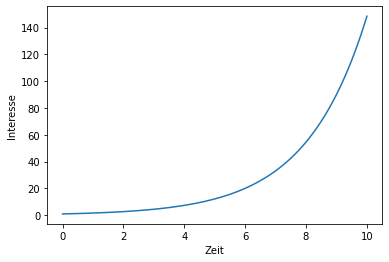

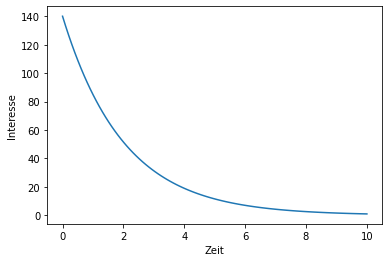

In [3]:
beta = 1
lamb = 0.5
Infizierte = np.exp((beta-lamb)*Zeit)
plt.plot(Zeit, Infizierte)
plt.xlabel("Zeit")
plt.ylabel("Interesse")
plt.show()
beta = 1
lamb = 1.5
Infizierte = 140*np.exp((beta-lamb)*Zeit)
plt.plot(Zeit, Infizierte)
plt.xlabel("Zeit")
plt.ylabel("Interesse")
plt.show()

Das Modell hat allerdings einige Schwächen:
- Unbeschränktes Wachstum
- Kann NPI nicht modellieren
- Genesung nicht realistisch
### Das SIR-Modell

SIR steht für die drei Grundbausteine
- Susceptible, also potenziell Infizierbare
- Infected, also Infizierte
- Recovered, also Genesene (inklusive Tote)

Wir schauen uns nur das grundlegende Modell an, diese Art der Modellierung ist allerdings der Goldstandard für Infektionskrankheiten.

Der grundlegende Zusammenhang lässt sich folgendermaßen beschreiben:

- Infizierbare werden von Infizierten infiziert, d.h. je mehr von ersteren oder zweiteren es gibt, desto mehr werden infiziert. In Kürze

$$ S' \propto -SI$$

Als Gleichung:

$$ S'(t) = -\beta S(t) I(t)$$
- Wir bekommen genauso viele neue Infizierte, wie auch Infizierbare infiziert werden. Zusätzlich verstirbt/erholt sich noch ein Teil der Infizierten:

$$ I'(t) = \beta S(t)I(t) - \lambda I(t)$$

- Schlussendlich sind genesene Infizierte Genesen:

$$ R'(t) = \lambda I(t) $$

Wir sehen (hoffentlich) intuitiv die Rechtfertigung für dieses Modell, allerdings ist das Modell ein wenig angenehmer, wenn wir es normalisieren:
$$ \hat{S}'(t) = -R_0 \hat{S} \hat{I}, \\
\hat{I}'(t) = R_0 \hat{S} \hat{I} - \hat{I},\\
\hat{R}'(t) = \hat{I}\\
$$
$R_0$ ist die *Reproduktionszahl*

Bei einer [Mortalität von 0.83%](https://www.medrxiv.org/content/10.1101/2021.01.26.21250507v1.full-text) und einem [$R_0$ von 2.2](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0248731) ohne Maßnahmen erhielten wir bei einer unkontrollierten Pandemie folgendes Szenario:


Anzahl Verstorbener:  560832
Maximale Anzahl gleichzeitig Infizierter:  15024957


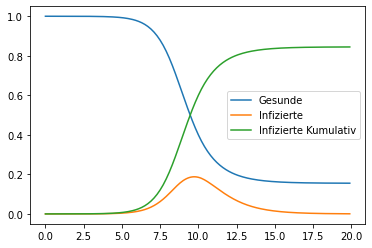

In [8]:
tmax = 20
def Löser(R_0, Mortalität, N, tmax):
    def Gleichungserzeuger(R0):
        def Gleichung(Zeit, Zustand):
            S, I, R = Zustand
            dS = -R0(I)*S*I
            dI = R0(I)*S*I-I
            dR = I
            return dS, dI, dR
        return Gleichung

    Anfangsbedingung = [0.99999, 0.00001, 0]
    Zeit = np.arange(0, tmax, 0.1)
    
    # odeint löst Differentialgleichungen. Dafür einfach eine Gleichung wie oben definieren.
    
    Zustände = solve_ivp(Gleichungserzeuger(R_0), (0,tmax), Anfangsbedingung, t_eval = Zeit )
    InfizierteKumulativ = 1-Zustände.y[0,:]
    print("Anzahl Verstorbener: ", int(InfizierteKumulativ[-1]*Mortalität*N))
    print("Maximale Anzahl gleichzeitig Infizierter: ", int(np.max(Zustände.y[1,:])*N))
    plt.plot(Zeit, Zustände.y[0,:])
    plt.plot(Zeit, Zustände.y[1,:])
    plt.plot(Zeit, InfizierteKumulativ)
    plt.legend(["Gesunde", "Infizierte", "Infizierte Kumulativ"])
    plt.show()
R_0 = lambda I: 2.2
Mortalität = 0.0083
N = 80000000
Löser(R_0, Mortalität, N, tmax)


Abschließend noch eine Erläuterung, wieso die deutsche Strategie einer Beschränkung auf einer bestimmten Inzidenz ziemlich schlecht ist.

Wir nehmen nun an, dass in unserem simplen Modell $R_0=2.2$ solange wir eine niedrige Inzidenz (also $I'$) haben, und ansonsten scharfe Maßnahmen durchführen und $R_0=0.9$ haben.

Anzahl Verstorbener:  381473
Maximale Anzahl gleichzeitig Infizierter:  168270


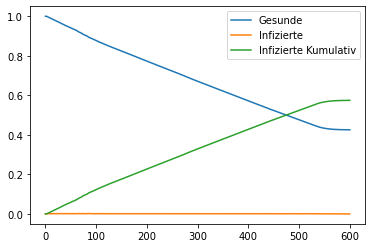

In [9]:
tmax = 600
def R_0(I):
    if I<0.001:
        return 2.2
    else:
        return 0.9
Löser(R_0, Mortalität, N, tmax)
